# Summarization of Finance News and sentiment Analysis

##### We are going to summarize the news articles of companies Tesla, Bitcoin and GameStop from the Yahoo Finance website.
##### We will perform sentiment analysis on the summaries of the news articles 

In [1]:
# Installing the transformers library

!pip install transformers

### Installing and Importing the Dependencies

In [2]:
# Importing the necessary libraries from the hugging face tranformers
# The below libaries will help us in training the textual data and creating token based on the data
# They will also help us in generating the output text from our data

from transformers import PegasusTokenizer, PegasusForConditionalGeneration

In [ ]:
# We also need to install the sentencepiece library inorder for our summarization model to perform better

# !pip install sentencepiece

In [3]:
# Setting up a summarization model using transformers
# tokenizer will give us the tokens for textual data and model is being trained with object as model

model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

### Summarizing the single article

In [4]:
# We are taking an article from the huggingface website as an example

text_to_summarize = "National Commercial Bank (NCB), Saudi Arabia’s largest lender by assets, agreed to buy rival Samba Financial Group for $15 billion in the biggest banking takeover this year.NCB will pay 28.45 riyals ($7.58) for each Samba share, according to a statement on Sunday, valuing it at about 55.7 billion riyals. NCB will offer 0.739 new shares for each Samba share, at the lower end of the 0.736-0.787 ratio the banks set when they signed an initial framework agreement in June.The offer is a 3.5% premium to Samba’s Oct. 8 closing price of 27.50 riyals and about 24% higher than the level the shares traded at before the talks were made public. Bloomberg News first reported the merger discussions.The new bank will have total assets of more than $220 billion, creating the Gulf region’s third-largest lender. The entity’s $46 billion market capitalization nearly matches that of Qatar National Bank QPSC, which is still the Middle East’s biggest lender with about $268 billion of assets."

In [5]:
# The length of the article is nearly 983 words

len(text_to_summarize)

983

In [6]:
# Tokenizing our text using the Pegasus tokenizer and tensors of Pytorch

input_ids = tokenizer(text_to_summarize, return_tensors="pt").input_ids

In [7]:
# We got the tokens and they are 214 in number
# The tokens got reduced as compared to the length of the article
# The pre-trained summarization model cleared all the unnecessary text from our data

len(input_ids[0])

214

In [8]:
# We are defining the output of our model with input as input_ids obtained from the model
# The max length of the summary is defined as 32 and beams used are 5

output = model.generate(
    input_ids, 
    max_length=32, 
    num_beams=5, 
    early_stopping=True)

In [9]:
# Finally, we can print the generated summary using the decoder of tokenizer

print(tokenizer.decode(output[0], skip_special_tokens=True))

Saudi bank to pay a 3.5% premium to Samba share price. Gulf region’s third-largest lender will have total assets of $220 billion


In [10]:
# Installing the lxml package of the html to scrape the data better using the beautiful soup

!pip install lxml

In [11]:
# Importing the Beautiful Soup library to scrape the html contents of website
# Importing the requests library to get the contents of the scraped data

from bs4 import BeautifulSoup
import requests

In [12]:
# We are defining the tickers of our companies as monitored tickers 
# We are going to scrape the news articles of these companies from the Yahoo Finance website

monitored_tickers = ['GME','TSLA','BTC']

In [13]:
# We are defining the URL of yahoo finance for our analysis

search_url = "https://www.google.com/search?q=yahoo+finance+{}&tbm=nws".format("TSLA")

In [14]:
# r = requests.get(search_url)

In [15]:
# soup = BeautifulSoup(r.text,"lxml")

In [16]:
# atags = soup.find_all("a")

In [17]:
# atags

[<a href="/?sa=X&amp;ved=0ahUKEwiv7q_K_KL0AhXYc94KHYgyCiUQOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a class="l" href="/?output=search&amp;ie=UTF-8&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwiv7q_K_KL0AhXYc94KHYgyCiUQPAgE"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a href="/search?q=yahoo+finance+TSLA&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=X9WWYe_CDNjn-QaI5aioAg">here</a>,
 <a class="eZt8xd" href="/search?q=yahoo+finance+TSLA&amp;ie=UTF-8&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwiv7q_K_KL0AhXYc94KHYgyCiUQ_AUIBygA">All</a>,
 <a class="eZt8xd" href="/search?q=yahoo+finance+TSLA&amp;ie=UTF-8&amp;tbm=shop&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwiv7q_K_KL0AhXYc94KHYgyCiUQ_AUICSgC">Shopping</a>,
 <a class="

### Data Collection

In [24]:
# We are now defining a function called search_for_stock_news_urls for getting the news article links
# We are using the link of Yahoo Finance website as the search url for data
# We are using requests module to access the contents of the url
# We are using the beautiful soup library to get the atags and hrefs of the html documents

def search_for_stock_news_urls(ticker):
    search_url = "https://www.google.com/search?q=yahoo+finance+{}&tbm=nws".format(ticker)
    r = requests.get(search_url)
    soup = BeautifulSoup(r.text,"html.parser")
    atags = soup.find_all("a")
    hrefs = [link["href"] for link in atags]
    return hrefs

In [25]:
# The below are the links for the TESLA company

search_for_stock_news_urls("TSLA")

['/?sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQOwgC',
 '/?output=search&ie=UTF-8&tbm=nws&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQPAgE',
 '/search?q=yahoo+finance+TSLA&tbm=nws&ie=UTF-8&gbv=1&sei=YdWWYYipCpf8wQP2lJ6ICQ',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQ_AUIBygA',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQ_AUICSgC',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQ_AUICigD',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQ_AUICygE',
 'https://maps.google.com/maps?q=yahoo+finance+TSLA&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQ_AUIDCgF',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwjI3afL_KL0AhUXfnAKHXaKB5EQ_AUIDSgG',
 '/advanced_search',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ah

In [26]:
# len(search_for_stock_news_urls("GME"))

In [27]:
# Here, we are doing the data collection in the same way as previous function
# But we are modifying the data volume by increasing the number of article links gathered
# We are collecting the links of nearly 300 articles from the website with 100 links for each company

def search_for_stock_news_urls(ticker):
    search_url = "https://www.google.com/search?q=yahoo+finance+{}&tbm=nws".format(ticker)
    all_hrefs = []
    for i in range(0,101,10):
        r = requests.get(search_url+"&start={}".format(i))
        soup = BeautifulSoup(r.text,"html.parser")
        atags = soup.find_all("a")
        hrefs = [link["href"] for link in atags]
        all_hrefs += hrefs
    return all_hrefs

In [28]:
search_for_stock_news_urls("TSLA")

['/?sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8QOwgC',
 '/?output=search&ie=UTF-8&tbm=nws&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8QPAgE',
 '/search?q=yahoo+finance+TSLA&tbm=nws&ie=UTF-8&gbv=1&sei=YdWWYbHAOdKi-QbE4b14',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8Q_AUIBygA',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8Q_AUICSgC',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8Q_AUICigD',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8Q_AUICygE',
 'https://maps.google.com/maps?q=yahoo+finance+TSLA&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8Q_AUIDCgF',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwjx9NbL_KL0AhVSUd4KHcRwDw8Q_AUIDSgG',
 '/advanced_search',
 '/search?q=yahoo+finance+TSLA&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUK

In [29]:
# Creating a dictionary of Urls by using the function created for getting the links

raw_urls = {ticker:search_for_stock_news_urls(ticker) for ticker in monitored_tickers}
raw_urls

{'GME': ['/?sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQOwgC',
  '/?output=search&ie=UTF-8&tbm=nws&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQPAgE',
  '/search?q=yahoo+finance+GME&tbm=nws&ie=UTF-8&gbv=1&sei=bNWWYZS_Gtrm-AbYsayQDA',
  '/search?q=yahoo+finance+GME&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUIBygA',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUICSgC',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUICigD',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUICygE',
  'https://maps.google.com/maps?q=yahoo+finance+GME&um=1&ie=UTF-8&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUIDCgF',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUIDSgG',
  '/advanced_search',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa

In [30]:
# The keys of the urls dictionary have the tickers of 3 companies

raw_urls.keys()

dict_keys(['GME', 'TSLA', 'BTC'])

In [31]:
# The values of the urls dictionary is shown below with the urls of all 3 companies

raw_urls.values()

dict_values([['/?sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQOwgC', '/?output=search&ie=UTF-8&tbm=nws&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQPAgE', '/search?q=yahoo+finance+GME&tbm=nws&ie=UTF-8&gbv=1&sei=bNWWYZS_Gtrm-AbYsayQDA', '/search?q=yahoo+finance+GME&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUIBygA', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUICSgC', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUICigD', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUICygE', 'https://maps.google.com/maps?q=yahoo+finance+GME&um=1&ie=UTF-8&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUIDCgF', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwiUpdfQ_KL0AhVaM94KHdgYC8IQ_AUIDSgG', '/advanced_search', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwi

### Cleaning Data

In [33]:
# Importing the regular expressions library of python

import re

In [34]:
# We are creating an exclude list to eliminate the contents from our urls

exclude_list = ["maps","policies","accounts","preferences","support"]

In [35]:
# We are now creating a function strip_unwanted_urls to clean the urls collected
# We are using the regular expressions to clean the text by creating a function
# We are also exculding the items in the exclude list for further analysis

def strip_unwanted_urls(urls,exclude_list):
    val = []
    for url in urls:
        if "https://" in url and not any(exclude_word in url for exclude_word in exclude_list):
            res = re.findall(r"(https?://\S+)",url)[0].split("&")[0]
            val.append(res)
    return list(set(val))

In [36]:
# Now, we are looping through all the companies to collect the cleaned urls using the function created
# We got the data of urls of articles for all the companies

cleaned_urls = {ticker:strip_unwanted_urls(raw_urls[ticker],exclude_list) for ticker in monitored_tickers}
cleaned_urls

{'GME': ['https://finance.yahoo.com/news/truck-driver-shortage-ive-never-quite-seen-it-this-bad-in-30-years-analyst-says-165455483.html',
  'https://ca.finance.yahoo.com/news/registration-latin-americas-largest-independent-130000162.html',
  'https://finance.yahoo.com/news/international-game-technology-plc-reports-114000368.html',
  'https://finance.yahoo.com/news/outrace-ore-poised-turn-more-104100995.html',
  'https://finance.yahoo.com/news/binance-nft-x-cyball-x-162600988.html',
  'https://cointelegraph.com/news/yahoo-finance-rates-upcoming-nft-drop-as-one-of-the-top-10-most-attractive-projects-for-virality-and-execution',
  'https://finance.yahoo.com/news/saints-row-delayed-august-2022-063000618.html',
  'https://uk.finance.yahoo.com/news/data-scientists-engineers-game-imerit-170007506.html',
  'https://theglobalherald.com/business/all-eyes-on-squid-game-season-2-as-the-battle-for-streaming-subscribers-intensifies/',
  'https://finance.yahoo.com/news/canadas-video-game-industry-nat

In [37]:
# We are checking the urls of TESLA company as shown below

strip_unwanted_urls(raw_urls["TSLA"],exclude_list)

['https://finance.yahoo.com/news/we-may-need-to-start-thinking-about-tesla-at-3-trillion-morning-brief-091138404.html',
 'https://finance.yahoo.com/news/smart-choice-keep-marketaxess-holdings-164449048.html',
 'https://ca.finance.yahoo.com/news/stock-market-news-live-updates-november-1-2021-113201123.html',
 'https://finance.yahoo.com/news/6-etfs-ride-teslas-trillion-160504383.html',
 'https://ca.finance.yahoo.com/news/stock-market-news-live-updates-november-4-2021-221850383.html',
 'https://news.yahoo.com/county-special-finance-insurance-meeting-142908783.html',
 'https://finance.yahoo.com/news/tesla-is-not-enough-engine-no-1-bets-on-gm-white-paper-details-electric-vehicle-landscape-124811083.html',
 'https://finance.yahoo.com/news/big-short-investor-michael-burry-115320035.html',
 'https://finance.yahoo.com/news/tesla-tsla-outpaces-stock-market-214509071.html',
 'https://finance.yahoo.com/news/tesla-inclusion-in-sp-500-heres-how-the-stock-is-doing-160202609.html',
 'https://finance.y

In [39]:
# We are checking the urls of BITCOIN company as shown below

strip_unwanted_urls(raw_urls["BTC"],exclude_list)

['https://finance.yahoo.com/news/truck-driver-shortage-ive-never-quite-seen-it-this-bad-in-30-years-analyst-says-165455483.html',
 'https://ca.finance.yahoo.com/news/sec-rejects-bitcoin-etf-showing-173027686.html',
 'https://cointelegraph.com/news/yahoo-finance-rates-upcoming-nft-drop-as-one-of-the-top-10-most-attractive-projects-for-virality-and-execution',
 'https://ca.finance.yahoo.com/news/suddenly-a-bitcoin-move-to-100-k-doesnt-seem-so-farfetched-morning-brief-091212180.html',
 'https://finance.yahoo.com/news/bitcoin-well-announces-addition-over-120000159.html',
 'https://finance.yahoo.com/news/peter-thiel-says-bitcoin-60-155334341.html',
 'https://markets.businessinsider.com/news/currencies/sam-bankman-fried-solana-ethereum-mass-adoption-crypto-ftx-2021-11',
 'https://ca.finance.yahoo.com/news/why-jpmorgan-ceo-jamie-dimon-120000957.html',
 'https://finance.yahoo.com/news/what-the-shiba-inu-led-memecoin-craze-says-about-crypto-oversight-morning-brief-090724642.html',
 'https://new

### Collecting the textual data from the URLs

In [41]:
# We are now writing a function called scrape_and_process to get the textual data of the cleaned URLs
# We are again using the beautiful soup library to scrape the data in paragraphs from our urls
# We are splitting the article data into the length of only 350 as the model is performing better with limited number of words
# This function will return the list of articles textual data

def scrape_and_process(URLs):
    ARTICLES = []
    for url in URLs:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, "html.parser")
        paragraphs = soup.find_all("p")
        text = [paragraph.text for paragraph in paragraphs]
        words = " ".join(text).split(" ")[:350]
        ARTICLE = " ".join(words)
        ARTICLES.append(ARTICLE)
    return ARTICLES

In [42]:
# Now we are looping through the companies to get the textual data of articles
# We are using the function created above to get the scraped data

articles = {ticker:scrape_and_process(cleaned_urls[ticker]) for ticker in monitored_tickers}
articles

{'GME': ["Supply chain woes continue to paint an increasingly bleak the picture for the trucking industry, said Jason Seidl, Cowen managing director of industrials — airfreight and surface transportation. Finding workers to drive trucks has increasingly been an issue in the industry, according to Seidl. “Clearly, we've had some problems hiring truckers lately,” he said in a segment with Yahoo Finance Live on Wednesday. “I've been around the trucking industry almost 30 years, and I've never quite seen it this bad.” A labor shortage beginning early 2021 has stretched across multiple industries across the nation, but the trucking industry in particular has sustained some nasty blows to its labor force. According to the American Truckers Association, the US currently faces an all-time high shortage of 80,000 truckers. An infrastructure bill signed into law by President Biden attempts to alleviate some of these concerns for the trucking industry and transportation services in general. The $

### Summarizing the Articles

In [43]:
# Summarizing the articles
# We are creating a function to summarize the articles textual data
# We are using the financial summarization model that was already defined in our model
# This will return the summaries of all the articles available in our data
# It will convert the input data into tokens and will decode the summary using model generate function

def summarize(articles):
    summaries = []
    for article in articles:
        input_ids = tokenizer.encode(article, return_tensors="pt",max_length=500)
        output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

In [45]:
# Now we are looping through the companies to get the summarized textual data of articles
# We are using the function created above to get the summarized data

summaries = {ticker:summarize(articles[ticker]) for ticker in monitored_tickers}
summaries

{'GME': ['Labor shortage, supply chain issues continue to weigh on shares. Infrastructure bill signed into law will help, but not immediately',
  'Largest independent game festival in Latin America returns to So Paulo in July 2022.',
  'Adjusted EBITDA of $407 million, among highest levels in Company history',
  'Online racing game Outrace now has NFTs and Blockchain technology incorporated.',
  'CyBall, GuildFi and NFT to co-host first-ever Triple IGO. Each Genesis Pack will contain 3 CyBloc NFTs',
  'Check the anti-virus on your device to ensure it is not infected.',
  'The open-world game will now be released on August 23, 2022. Volition’s Boone explains why the game is being pushed back',
  'iMerit ML DataOps Summit will be held on 2 December in San Francisco.',
  'All eyes on ‘Squid Game’ season 2 as the battle for streaming subscribers intensifies.',
  "Video game industry supports 55,300 Canadian jobs from coast to coast. Digital innovation was key to industry's success during p

### Sentiment Analysis

In [46]:
# Sentiment Analysis
# We are importing the transformers for applying the sentiment analysis
# We are using the pre-trained sentiment analysis pipeline for getting the labels and sentiment scores of our summarized data

import transformers
sentiments = transformers.pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [47]:
# Now we are looping through the companies to get the sentiment labels and scores of articles
# We are using the function created above to get the sentiment data of the summarized articles

sentiment_values = {ticker:sentiments(summaries[ticker]) for ticker in monitored_tickers}
sentiment_values

{'GME': [{'label': 'NEGATIVE', 'score': 0.9898883700370789},
  {'label': 'POSITIVE', 'score': 0.9981368780136108},
  {'label': 'POSITIVE', 'score': 0.9247127175331116},
  {'label': 'POSITIVE', 'score': 0.8683162331581116},
  {'label': 'POSITIVE', 'score': 0.9668111801147461},
  {'label': 'NEGATIVE', 'score': 0.9803959727287292},
  {'label': 'NEGATIVE', 'score': 0.9973781108856201},
  {'label': 'POSITIVE', 'score': 0.9739183187484741},
  {'label': 'POSITIVE', 'score': 0.9080391526222229},
  {'label': 'POSITIVE', 'score': 0.9990345239639282},
  {'label': 'NEGATIVE', 'score': 0.9931857585906982},
  {'label': 'POSITIVE', 'score': 0.5267537832260132},
  {'label': 'NEGATIVE', 'score': 0.9672676920890808},
  {'label': 'NEGATIVE', 'score': 0.9958401918411255},
  {'label': 'NEGATIVE', 'score': 0.9406105875968933},
  {'label': 'POSITIVE', 'score': 0.9990278482437134},
  {'label': 'POSITIVE', 'score': 0.9746777415275574},
  {'label': 'POSITIVE', 'score': 0.9241648316383362},
  {'label': 'NEGATIVE

### Converting the data into CSV format

In [59]:
# We are now creating a shape for the summarized data along with the sentinent analysis data
# We are creating a function to grab the insights of the available data

def list_of_details(summaries,links,sentiments):
    details = []
    for ticker in monitored_tickers:
        for i in range(len(summaries[ticker])):
            data = [
                ticker,
                links[ticker][i],
                summaries[ticker][i],
                sentiments[ticker][i]["label"],
                sentiments[ticker][i]["score"]
            ]
            details.append(data)
    return details

In [60]:
# We looped through all the companies and created a large list of data from the available data
# We included summaries, article links, sentiment labels and scores and company tickers

collected_data = list_of_details(summaries,cleaned_urls,sentiment_values)
collected_data

[['GME',
  'https://finance.yahoo.com/news/truck-driver-shortage-ive-never-quite-seen-it-this-bad-in-30-years-analyst-says-165455483.html',
  'Labor shortage, supply chain issues continue to weigh on shares. Infrastructure bill signed into law will help, but not immediately',
  'NEGATIVE',
  0.9898883700370789],
 ['GME',
  'https://ca.finance.yahoo.com/news/registration-latin-americas-largest-independent-130000162.html',
  'Largest independent game festival in Latin America returns to So Paulo in July 2022.',
  'POSITIVE',
  0.9981368780136108],
 ['GME',
  'https://finance.yahoo.com/news/international-game-technology-plc-reports-114000368.html',
  'Adjusted EBITDA of $407 million, among highest levels in Company history',
  'POSITIVE',
  0.9247127175331116],
 ['GME',
  'https://finance.yahoo.com/news/outrace-ore-poised-turn-more-104100995.html',
  'Online racing game Outrace now has NFTs and Blockchain technology incorporated.',
  'POSITIVE',
  0.8683162331581116],
 ['GME',
  'https://

In [58]:
# We are checking the sample of data that was created

collected_data[1]

['GME',
 'Largest independent game festival in Latin America returns to So Paulo in July 2022.',
 'POSITIVE',
 0.9981368780136108,
 'https://ca.finance.yahoo.com/news/registration-latin-americas-largest-independent-130000162.html']

In [61]:
# Inserting a list of column names for the data and adding it to the existing list

collected_data.insert(0,["Company_Ticker","News_article_link","Article_Summary","Article_label","Sentiment_score"])
collected_data

[['Company_Ticker',
  'News_article_link',
  'Article_Summary',
  'Article_label',
  'Sentiment_score'],
 ['GME',
  'https://finance.yahoo.com/news/truck-driver-shortage-ive-never-quite-seen-it-this-bad-in-30-years-analyst-says-165455483.html',
  'Labor shortage, supply chain issues continue to weigh on shares. Infrastructure bill signed into law will help, but not immediately',
  'NEGATIVE',
  0.9898883700370789],
 ['GME',
  'https://ca.finance.yahoo.com/news/registration-latin-americas-largest-independent-130000162.html',
  'Largest independent game festival in Latin America returns to So Paulo in July 2022.',
  'POSITIVE',
  0.9981368780136108],
 ['GME',
  'https://finance.yahoo.com/news/international-game-technology-plc-reports-114000368.html',
  'Adjusted EBITDA of $407 million, among highest levels in Company history',
  'POSITIVE',
  0.9247127175331116],
 ['GME',
  'https://finance.yahoo.com/news/outrace-ore-poised-turn-more-104100995.html',
  'Online racing game Outrace now has

In [64]:
# We are now converting our data into CSV format
# We are importing the CSV module and using the csv's write function we are creating a comma seperated file

import csv
with open("News_Summarization.csv",mode="w",newline="") as f:
    data_to_csv = csv.writer(f, delimiter = ",", quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    data_to_csv.writerows(collected_data)

In [18]:
# We are importing the created csv file using the pandas module of python
# We are creating a dataframe based on the csv file and pandas module

import pandas as pd
summarization_data = pd.read_csv("News_Summarization.csv")
summarization_data

,Company_Ticker,News_article_link,Article_Summary,Article_label,Sentiment_score
0,GME,https://finance.yahoo.com/news/truck-driver-sh...,"Labor shortage, supply chain issues continue t...",NEGATIVE,0.989888
1,GME,https://ca.finance.yahoo.com/news/registration...,Largest independent game festival in Latin Ame...,POSITIVE,0.998137
2,GME,https://finance.yahoo.com/news/international-g...,"Adjusted EBITDA of $407 million, among highest...",POSITIVE,0.924713
3,GME,https://finance.yahoo.com/news/outrace-ore-poi...,Online racing game Outrace now has NFTs and Bl...,POSITIVE,0.868316
4,GME,https://finance.yahoo.com/news/binance-nft-x-c...,"CyBall, GuildFi and NFT to co-host first-ever ...",POSITIVE,0.966811
...,...,...,...,...,...
322,BTC,https://ca.finance.yahoo.com/news/why-bitcoins...,Analysts expect more short-term volatility as ...,NEGATIVE,0.998440
323,BTC,https://ca.finance.yahoo.com/news/hive-vs-hut-...,HIVE Blockchain and Hut 8 Mining are trading h...,NEGATIVE,0.638068
324,BTC,https://finance.yahoo.com/news/crypto-daily-mo...,"A mixed start to the day saw Bitcoin rise, fal...",NEGATIVE,0.963826
325,BTC,https://ca.finance.yahoo.com/news/fidelity-cle...,Fidelity Clearing Canada launches new institut...,POSITIVE,0.996329


In [19]:
# Checking the shape of the dataframe

summarization_data.shape

(327, 5)

In [20]:
# Checking the info or our dataframe
# We can see that our data has a total of 327 instances and 5 attributes
# There are no NULL values in our dataset from the below data

summarization_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Ticker     327 non-null    object 
 1   News_article_link  327 non-null    object 
 2   Article_Summary    327 non-null    object 
 3   Article_label      327 non-null    object 
 4   Sentiment_score    327 non-null    float64
dtypes: float64(1), object(4)
memory usage: 12.9+ KB


In [21]:
# We are using the describe function to see how the numerical aspects of our data are performing 

summarization_data.describe()

,Sentiment_score
count,327.000000
mean,0.950449
std,0.098681
min,0.513830
25%,0.967039
50%,0.992842
75%,0.997909
max,0.999800


### Visualization using Spacy library

In [22]:
# We are importing the Spacy library of python
# We are also importing the displacy module for visualization

import spacy
from spacy import displacy

In [23]:
# We also need to install the "en_core_web_sm" data library for spacy analysis

In [24]:
# We are loading the "en_core_web_sm" data dictionary using the nlp object

nlp = spacy.load("en_core_web_sm")

In [25]:
# We are defining a single summarized article into text object for visualization

text = nlp(summarization_data["Article_Summary"][212])

In [26]:
# The summary of the text object is shown below

summarization_data["Article_Summary"][212]

'Tesla posts higher-than-expected earnings, shares surge. Toyota to invest $3.4 billion in U.S., creating 1,750 jobs'

In [27]:
# Using the displacy render method, we are getting the parts of speech tagging as shown below

displacy.render(text,style="dep",jupyter=True)

In [10]:
# Defining various option for the better visualization of POS tagging

options = {"distance":50,"compact":"True","color":"yellow","bg":"green"}

In [28]:
# We are visualizing the text based on the options included

displacy.render(text,style="dep",jupyter=True,options=options)

In [14]:
# We are now splitting the multiple sentense data seperately using the sents method

spans = list(text.sents)

In [15]:
# Defining various option for the better visualization of POS tagging

new_options = {"distance":100,"compact":"True","color":"yellow","bg":"green"}

In [29]:
# We are visualizing the text based on the options included
# Now we can see that the data split into seperate sentences

displacy.render(spans,style="dep",options=new_options)

In [211]:
# We are also plotting the data using the Named entity recognition patterns

displacy.render(text,style="ent",jupyter=True)

In [212]:
# We are now seperating the sentenses and applying the named entity plotting of data

for sent in text.sents:
    displacy.render(nlp(sent.text),style="ent",jupyter=True)

C:\Users\Uma Maheswararao G\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [213]:
# We are choosing the entity option as shown below

ent_options = {"ents":["ORG","GPE"]}

In [214]:
# We are plotting with only necessary entities like ORGANIZATION and Location

displacy.render(text,style="ent",jupyter=True,options=ent_options)

In [215]:
# We are using the serve method of displacy to connect to the local host for viewing the visualizations

displacy.serve(text,style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### Text Classification

In [216]:
# Importing the seaborn library for data visualization

import seaborn as sns

In [217]:
# Checking the head of our dataframe

summarization_data.head()

,Company_Ticker,News_article_link,Article_Summary,Article_label,Sentiment_score
0,GME,https://finance.yahoo.com/news/truck-driver-sh...,"Labor shortage, supply chain issues continue t...",NEGATIVE,0.989888
1,GME,https://ca.finance.yahoo.com/news/registration...,Largest independent game festival in Latin Ame...,POSITIVE,0.998137
2,GME,https://finance.yahoo.com/news/international-g...,"Adjusted EBITDA of $407 million, among highest...",POSITIVE,0.924713
3,GME,https://finance.yahoo.com/news/outrace-ore-poi...,Online racing game Outrace now has NFTs and Bl...,POSITIVE,0.868316
4,GME,https://finance.yahoo.com/news/binance-nft-x-c...,"CyBall, GuildFi and NFT to co-host first-ever ...",POSITIVE,0.966811


In [218]:
# We are now looking at the number of positive and negative labels present in our data

summarization_data["Article_label"].value_counts()

POSITIVE    174
NEGATIVE    153
Name: Article_label, dtype: int64

In [219]:
# Checking at the shape of our summarization data

summarization_data.shape

(327, 5)

In [220]:
# There are no NULL values in our dataset from the output shown below

summarization_data.isnull().sum()

Company_Ticker       0
News_article_link    0
Article_Summary      0
Article_label        0
Sentiment_score      0
dtype: int64

In [221]:
# Checking the type of the summary text in our data

type(summarization_data["Article_Summary"][0])

str

In [222]:
# We are creating a new dataset with only required columns and features

summarization_dataframe = summarization_data[["Article_Summary","Article_label"]]
summarization_dataframe.head()

,Article_Summary,Article_label
0,"Labor shortage, supply chain issues continue t...",NEGATIVE
1,Largest independent game festival in Latin Ame...,POSITIVE
2,"Adjusted EBITDA of $407 million, among highest...",POSITIVE
3,Online racing game Outrace now has NFTs and Bl...,POSITIVE
4,"CyBall, GuildFi and NFT to co-host first-ever ...",POSITIVE


C:\Users\Uma Maheswararao G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Article_label', ylabel='count'>

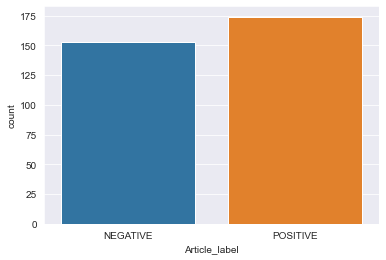

In [227]:
# Visualizing the count plot of our data for the count of output labels

sns.countplot(summarization_dataframe["Article_label"])

In [112]:
# Check for whitespace strings and we can no white space strings available in our data

indexes = []

for index,label,summary in summarization_dataframe.itertuples():
    if summary.isspace():
        indexes.append(index)

In [113]:
# The output of the white space strings is zero as there are no white space strings in our data

indexes

[]

In [116]:
# Drop NULL values incase if any of them are present

summarization_dataframe.dropna(inplace=True)

<ipython-input-116-e6b4d0961f82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summarization_dataframe.dropna(inplace=True)


In [ ]:
# Defining the input and output columns of our data

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# X is text summary which is input data
# y is the output label of our data

X = summarization_dataframe["Article_Summary"]
y = summarization_dataframe["Article_label"]

In [119]:
# Splitting the data with 70 % of training data and 30 % of testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [120]:
# Now we will import TF-IDF Vectorizer for converting text data into numerical values

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [240]:
# Importing Support Vector Classifier, KNeighborsClassifier, Logistic Regression and Pipeline object

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#### Support Vector Classifier

In [373]:
text_classification_svc = Pipeline([("tf_idf",TfidfVectorizer()), ("sv_classifier",SVC(kernel="linear"))])

In [374]:
text_classification_svc.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('sv_classifier', SVC(kernel='linear'))])

In [375]:
# Predictions

In [376]:
svc_predictions = text_classification_svc.predict(X_test)

In [377]:
# Evaluation Metrics

In [378]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [384]:
con_matrix = confusion_matrix(svc_predictions,y_test)

<AxesSubplot:>

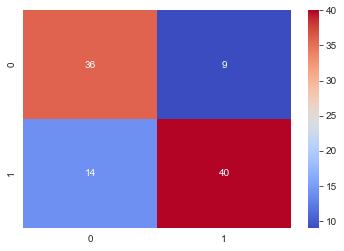

In [386]:
# Plotting the confusion matrix using the seaborn heatmap

import seaborn as sns
sns.heatmap(con_matrix,annot=True,cmap="coolwarm")

In [387]:
# The classification report of the support vector classifier predictions is shown here
# We have a better recall, precision and accuracy for our model 

print(classification_report(svc_predictions,y_test))

              precision    recall  f1-score   support

    NEGATIVE       0.72      0.80      0.76        45
    POSITIVE       0.82      0.74      0.78        54

    accuracy                           0.77        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.77      0.77      0.77        99



In [388]:
# Accuracy of the model is nearly 77 % from the below metrics

accuracy_score(svc_predictions,y_test).round(2)

0.77

#### K Nearest Neighbors Classifier

In [310]:
# Creating the pipeline for K nearest neighbors classifier

text_classification_knn = Pipeline([("tf_idf",TfidfVectorizer()), ("knn_classifier",KNeighborsClassifier(n_neighbors=3))])

In [311]:
# Fitting the data into the knn pipeline

text_classification_knn.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=3))])

In [312]:
# Predicting the test data of our model

knn_predictions = text_classification_knn.predict(X_test)

In [313]:
# Confusion matrix of our predictions

print(confusion_matrix(knn_predictions,y_test))

[[36 13]
 [14 36]]


In [314]:
# Classification Report of our predictions using the K nearest neighbors classifier

print(classification_report(knn_predictions,y_test))

              precision    recall  f1-score   support

    NEGATIVE       0.72      0.73      0.73        49
    POSITIVE       0.73      0.72      0.73        50

    accuracy                           0.73        99
   macro avg       0.73      0.73      0.73        99
weighted avg       0.73      0.73      0.73        99



In [315]:
# Accuracy score of our model using the K nearest neighbors classifier

accuracy_score(knn_predictions,y_test).round(2)

0.73

#### Logistic Regression

In [172]:
# Creating the pipeline for Logistic Regression classifier

text_classification_lr = Pipeline([("tf_idf",TfidfVectorizer()), ("lr_classifier",LogisticRegression())])

In [173]:
# Fitting the data into the Logistic Regression pipeline

text_classification_lr.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('lr_classifier', LogisticRegression())])

In [174]:
# Predicting the test data of our model

lr_predictions = text_classification_lr.predict(X_test)

In [228]:
# Confusion matrix of our predictions

print(confusion_matrix(lr_predictions,y_test))

[[34 10]
 [16 39]]


In [176]:
# Classification Report of our predictions using the Logistic Regression classifier

print(classification_report(lr_predictions,y_test))

              precision    recall  f1-score   support

    NEGATIVE       0.68      0.77      0.72        44
    POSITIVE       0.80      0.71      0.75        55

    accuracy                           0.74        99
   macro avg       0.74      0.74      0.74        99
weighted avg       0.74      0.74      0.74        99



In [178]:
# Accuracy score of our model using the Logistic Regression classifier

accuracy_score(lr_predictions,y_test).round(2)

0.74

In [189]:
# Classes of our text classification model

text_classification_svc.classes_

array(['NEGATIVE', 'POSITIVE'], dtype=object)

# Conclusions

### We got the results of the summarization pipeline using the Pegasus tokenizer of the hugging face transformers human centered summarization. Additionally, we applied the text classification on the results of sentiment analysis pipeline to perform predictive analysis on our data. We got an accuracy of nearly 77% with Linear Support vector classifier model. Along with the accuracy, we have better precision for positive summary predictions and better recall for negative summary predictions. Overall there is better f1-score and accuracy. Our model did well in performing the text classification. 


In [190]:
# The best parameters of Linear Support Vector Classifier

text_classification_svc.get_params()

{'memory': None,
 'steps': [('tf_idf', TfidfVectorizer()), ('sv_classifier', LinearSVC())],
 'verbose': False,
 'tf_idf': TfidfVectorizer(),
 'sv_classifier': LinearSVC(),
 'tf_idf__analyzer': 'word',
 'tf_idf__binary': False,
 'tf_idf__decode_error': 'strict',
 'tf_idf__dtype': numpy.float64,
 'tf_idf__encoding': 'utf-8',
 'tf_idf__input': 'content',
 'tf_idf__lowercase': True,
 'tf_idf__max_df': 1.0,
 'tf_idf__max_features': None,
 'tf_idf__min_df': 1,
 'tf_idf__ngram_range': (1, 1),
 'tf_idf__norm': 'l2',
 'tf_idf__preprocessor': None,
 'tf_idf__smooth_idf': True,
 'tf_idf__stop_words': None,
 'tf_idf__strip_accents': None,
 'tf_idf__sublinear_tf': False,
 'tf_idf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tf_idf__tokenizer': None,
 'tf_idf__use_idf': True,
 'tf_idf__vocabulary': None,
 'sv_classifier__C': 1.0,
 'sv_classifier__class_weight': None,
 'sv_classifier__dual': True,
 'sv_classifier__fit_intercept': True,
 'sv_classifier__intercept_scaling': 1,
 'sv_classifier__loss': 'squar